### Librerías

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random
import os
from skimage.io import imread
import cv2
import imutils
from sklearn.model_selection import train_test_split

### Constantes

In [26]:
IMG_SIZE = (224,224)

PATH = "./imagenes/"

#Encoding para despues
CLASS_NAME = {'Angelfish':0, 'Bedotia':1, 'Betta':2,
                   'cebra':3, 'Globo':4, 'Goldfish':5,
                   'Gourami':6, 'Guppy':7, 'Hypostomus':8,
                  'molly':9, 'platys':10, 'Ramizeri':11,
                  'Symphysodon':12, 'Killis':13, 'Arcoiris':14}

### Función para renombrar imágenes para crear el df

In [24]:
def renombrado(path, guardado):
    directorios = ['Angelfish', 'Bedotia_geayi', 'Betta',
                   'cebra', 'Globo2', 'Goldfish2',
                   'Gourami', 'Guppy', 'Hypostomus_plecostomus',
                  'molly', 'platys', 'Ramizeri',
                  'Symphysodon', 'Killis', 'Arcoiris']
    
    for directorio in directorios:
        i = 0
        path_aux = (path + directorio)
        for imagen in os.listdir(path_aux):
            img = cv2.imread(path_aux +'/'+ imagen)
            # small_img = cv2.resize(img, (224, 224))
            imagen_nom = guardado + directorio + '.' + str(i)  + '_normalizada.jpg'
            cv2.imwrite(imagen_nom, img)
            i += 1
        

In [4]:
try:
    os.mkdir("Imagenes normalizadas")
except FileExistsError: 
    pass

In [5]:
guardado = "./Imagenes normalizadas/"

In [6]:
renombrado(PATH, guardado)

In [96]:
imagenes_sin_fondo = "./sin fondo procesado"

### Creación de dataframe

In [97]:
# Listamos todos los archivos de la carpeta de guardado(donde están todas las imágenes normalizadas)
filenames = os.listdir(imagenes_sin_fondo)
try: 
    filenames.remove('.ipynb_checkpoints')
except: 
    pass
print('todos',len(filenames))
# filenames.remove('.DS_Store')
print('sin ocultos',len(filenames))

#Creamos una lsita vacía para nuestro encoding
fish = []
import re
digits = r"[0-9]"
# Iteramosterar sobre los archivos
for filename in filenames:
    if filename[0] != ".": # No es un directorio:
        category = re.sub(digits, '', filename.split('.')[0].split('_')[0])
        fish.append(CLASS_NAME[category])

fish_df = pd.DataFrame({
    'Filename': filenames,
    'Target': fish

})

# fish_df.head()

todos 271
sin ocultos 271


In [159]:
filenames_list = list(fish_df['Filename'])

target_list = list(fish_df['Target'])

fish_df['Filename']

0         Angelfish0_normalizada.png
1        Angelfish10_normalizada.png
2        Angelfish11_normalizada.png
3        Angelfish12_normalizada.png
4        Angelfish13_normalizada.png
                   ...              
266    Symphysodon43_normalizada.png
267    Symphysodon44_normalizada.png
268    Symphysodon45_normalizada.png
269     Symphysodon8_normalizada.png
270     Symphysodon9_normalizada.png
Name: Filename, Length: 271, dtype: object

### Preparar Split de test y train y resize imagen

In [174]:
string = "Angelfish10_normalizada.png"
h = re.split(r"[0-9]", string)
hello = re.findall(r"[0-9]",string)
print(h[0]+'.'+''.join(hello)+h[-1][:-3]+'jpg')

Angelfish.10_normalizada.jpg


In [ ]:
test.insert(-1, '.')
test = ''.join(test)
print(extension[-3:])
extension = extension.rstrip('png')
print(test+'_'+extension+'jpg')

In [176]:
X = []
y = []

guardado = "./Imagenes_normalizadas/"
for file in filenames_list:
    file_name_no_counter = re.split(r"[0-9]", file)
    file_counter = re.findall(r"[0-9]",file)
    img = imread(guardado + file_name_no_counter[0]+'.'+''.join(file_counter)+file_name_no_counter[-1][:-3]+'jpg')
    image_resized = cv2.resize(img, IMG_SIZE)
    X.append(image_resized)
    
X = np.array(X)
y = np.array(target_list)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(216, 224, 224, 3)
(216,)
(55, 224, 224, 3)
(55,)


In [177]:
print("Min:", np.min(X_train))
print("Max:", np.max(X_train))

Min: 0
Max: 255


In [178]:
X_train = X_train / 255.0
X_test = X_test /255.0

print("Min:", np.min(X_train))
print("Max:", np.max(X_train))
print("Min:", np.min(X_test))
print("Max:", np.max(X_test))

Min: 0.0
Max: 1.0
Min: 0.0
Max: 1.0


In [107]:
train_df, validate_df = train_test_split(fish_df,
                                         test_size=0.20,
                                         random_state=42)

In [31]:
train_df

,Filename,Target
113,Betta39_normalizada.png,2
101,Betta28_normalizada.png,2
137,Goldfish214_normalizada.png,5
73,Bedotia_geayi18_normalizada.png,1
93,Betta20_normalizada.png,2
...,...,...
188,Guppy41_normalizada.png,7
71,Arcoiris9_normalizada.png,14
106,Betta32_normalizada.png,2
270,Ramizeri16_normalizada.png,11


In [104]:
try: 
    os.mkdir("train_images_sin_fondo")
    os.mkdir("test_images_sin_fondo")
except FileExistsError: 
    pass

In [105]:
import shutil

In [108]:
for file in train_df['Filename']:
    shutil.copy(f"sin fondo procesado/{file}", f"train_images_sin_fondo/{file}")
for file in validate_df['Filename']:
    shutil.copy(f"sin fondo procesado/{file}", f"test_images_sin_fondo/{file}")

In [14]:
try: 
    os.mkdir("train_images_2")
    os.mkdir("test_images_2")
except FileExistsError: 
    pass

In [21]:

i = 0
for x,y in zip(X_train, y_train): 
    filename = f"train_images_2/{INV_CLASSES[y]}.{i}.jpg"
    # print(filename)
    cv2.imwrite(filename, x)
    i += 1

train_images_2/cebra.0.jpg
train_images_2/Guppy.1.jpg
train_images_2/Ramizeri.2.jpg
train_images_2/platys.3.jpg
train_images_2/Arcoiris.4.jpg
train_images_2/Symphysodon.5.jpg
train_images_2/Symphysodon.6.jpg
train_images_2/Bedotia_geayi.7.jpg
train_images_2/Guppy.8.jpg
train_images_2/Gourami2.9.jpg
train_images_2/Angelfish.10.jpg
train_images_2/molly.11.jpg
train_images_2/Hypostomus_plecostomus.12.jpg
train_images_2/molly.13.jpg
train_images_2/Ramizeri.14.jpg
train_images_2/Gourami2.15.jpg
train_images_2/Globo2.16.jpg
train_images_2/Symphysodon.17.jpg
train_images_2/molly.18.jpg
train_images_2/Gourami2.19.jpg
train_images_2/molly.20.jpg
train_images_2/Symphysodon.21.jpg
train_images_2/Guppy.22.jpg
train_images_2/Arcoiris.23.jpg
train_images_2/Angelfish.24.jpg
train_images_2/cebra.25.jpg
train_images_2/Globo2.26.jpg
train_images_2/Hypostomus_plecostomus.27.jpg
train_images_2/Globo2.28.jpg
train_images_2/Globo2.29.jpg
train_images_2/Ramizeri.30.jpg
train_images_2/Arcoiris.31.jpg
train_im

In [22]:
i = 0
for x,y in zip(X_test, y_test): 
    filename = f"test_images_2/{INV_CLASSES[y]}.{i}.jpg"
    # print(filename)
    cv2.imwrite(filename, x)
    i += 1

## Machine learning model

In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras import layers
from keras.regularizers import l2
from tensorflow.keras import datasets, layers, models
import numpy as np
import cv2
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input

In [109]:
from keras.preprocessing.image import ImageDataGenerator

TRAIN_PATH = "./train_images_sin_fondo"
TEST_PATH = "./test_images_sin_fondo"
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale = 1.0/255. )

In [110]:
INV_CLASSES = {v: k for k, v in CLASS_NAME.items()}

In [114]:
fish_in_train = {re.sub(r"[0-9]", '', i.split('_')[0]) for i in train_df['Filename']}
print(len(fish_in_train))
fish_in_test = {re.sub(r"[0-9]", '', i.split('_')[0]) for i in validate_df['Filename']}
print(len(fish_in_test))

for i in fish_in_train: 
    if i not in fish_in_test: 
        print(i)

9
9


In [102]:
total_fish = [re.sub(r"[0-9]", '', i.split('_')[0]) for i in fish_df['Filename']]

In [103]:
from collections import Counter
Counter(total_fish)

Counter({'Angelfish': 43,
         'Arcoiris': 29,
         'Betta': 49,
         'Guppy': 47,
         'Hypostomus': 17,
         'Killis': 26,
         'platys': 11,
         'Ramizeri': 34,
         'Symphysodon': 15})

In [115]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    TRAIN_PATH,
                                                    x_col='Filename',
                                                    y_col='Target',
                                                    batch_size = 20,
                                                    class_mode = 'categorical',
                                                    target_size = IMG_SIZE)

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_dataframe(validate_df,
                                                              TEST_PATH,
                                                              x_col='Filename',
                                                              y_col='Target',
                                                              batch_size = 20,
                                                              class_mode = 'categorical',
                                                              target_size = IMG_SIZE)

Found 216 validated image filenames belonging to 9 classes.
Found 55 validated image filenames belonging to 9 classes.


## Resnet

In [118]:
base_model = ResNet50V2(input_shape = (224, 224, 3), 
                       include_top = False, 
                       weights = 'imagenet', 
                       # classifier_activation = 'softmax'
                         )
# conv1 = layers.Conv2D(28, (3,3), strides=(2,2), activation = None, kernel_regularizer=l2(0.))(resnet_model.outputs)
# model = Model(inputs=resnet_model.input, outputs=conv1)
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(9, activation='softmax')(x)

model_resnet = tf.keras.models.Model(base_model.input, x)

model_resnet.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['acc'])

In [119]:
model_resnet.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 10)

Epoch 1/10
11/11 [==============================] - 11s 707ms/step - loss: 6.5589 - acc: 0.2778 - val_loss: 16.4094 - val_acc: 0.1818
Epoch 2/10
11/11 [==============================] - 5s 447ms/step - loss: 2.1396 - acc: 0.3611 - val_loss: 13.8983 - val_acc: 0.2545
Epoch 3/10
11/11 [==============================] - 5s 466ms/step - loss: 2.1517 - acc: 0.3657 - val_loss: 118.0755 - val_acc: 0.2727
Epoch 4/10
11/11 [==============================] - 5s 463ms/step - loss: 1.7502 - acc: 0.4352 - val_loss: 5.0470 - val_acc: 0.3273
Epoch 5/10
11/11 [==============================] - 5s 461ms/step - loss: 1.4796 - acc: 0.5324 - val_loss: 166.7403 - val_acc: 0.1455
Epoch 6/10
11/11 [==============================] - 5s 458ms/step - loss: 1.4964 - acc: 0.5648 - val_loss: 30.7583 - val_acc: 0.1636
Epoch 7/10
11/11 [==============================] - 5s 441ms/step - loss: 1.1760 - acc: 0.6343 - val_loss: 25.0204 - val_acc: 0.2727
Epoch 8/10
11/11 [==============================] - 5s 448ms/step -

In [179]:
preds_resnet = model_resnet.predict(X_test)

In [149]:
validate_df.reset_index(inplace = True, drop = True)
validate_df

,Filename,Target
0,Betta.13_normalizada.jpg,Betta
1,Killis.9_normalizada.jpg,Killis
2,Symphysodon.23_normalizada.jpg,Symphysodon
3,Arcoiris.7_normalizada.jpg,Arcoiris
4,cebra.33_normalizada.jpg,cebra
...,...,...
116,Guppy.32_normalizada.jpg,Guppy
117,Betta.48_normalizada.jpg,Betta
118,platys.40_normalizada.jpg,platys
119,molly.27_normalizada.jpg,molly


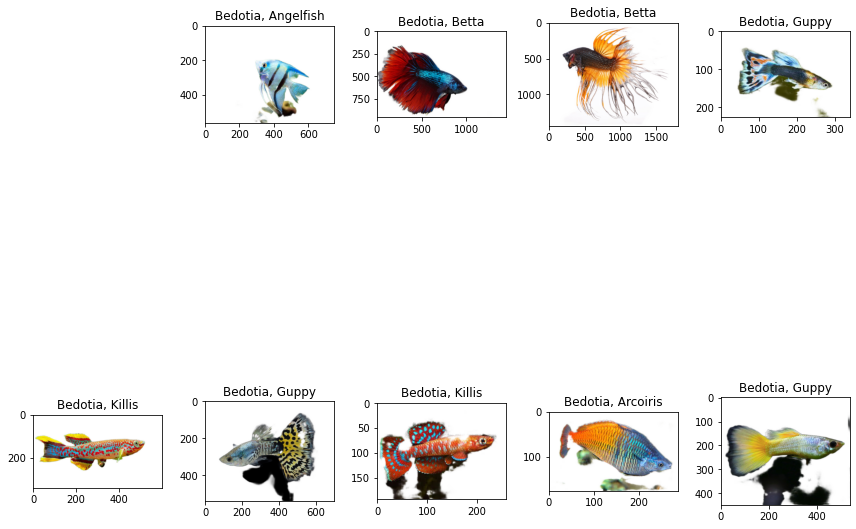

In [188]:
plt.figure(figsize=(12, 12))
for i, filename in zip(range(1,10), validate_df['Filename'][:10]):
    plt.subplot(2,5, i+1)
    plt.imshow(imread(TEST_PATH+'/'+filename))
    result = np.where(preds_resnet[i] == preds_resnet[i].max())
    plt.title(f"{INV_CLASSES[result[0][0]]}, {re.split(r'[0-9]',filename)[0]}")
    
plt.tight_layout()
plt.savefig('prediccion')
plt.show()

## InceptionV3

In [193]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

IM_SIZE = 224

base_model = InceptionV3(input_shape = (IM_SIZE, IM_SIZE, 3), 
                        include_top = False, 
                        weights = 'imagenet')

for layer in base_model.layers: 
    layer.trainable = False
    
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(9, activation = 'softmax')(x)


model_inception = tf.keras.models.Model(base_model.input, x)

model_inception.compile(optimizer = 'rmsprop', 
             loss = 'binary_crossentropy', 
             metrics = ['accuracy'])

In [194]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(patience=10, min_delta = 0.0001, restore_best_weights = True)

In [195]:
model_inception.fit(train_generator, 
         validation_data = validation_generator,
         batch_size = 20, 
         epochs = 50, 
         callbacks = [earlystop])

Epoch 1/50
11/11 [==============================] - 10s 675ms/step - loss: 24.0925 - accuracy: 0.1667 - val_loss: 7.3814 - val_accuracy: 0.3636
Epoch 2/50
11/11 [==============================] - 5s 423ms/step - loss: 6.8761 - accuracy: 0.3889 - val_loss: 6.0727 - val_accuracy: 0.3273
Epoch 3/50
11/11 [==============================] - 5s 456ms/step - loss: 4.0261 - accuracy: 0.5324 - val_loss: 4.4426 - val_accuracy: 0.4000
Epoch 4/50
11/11 [==============================] - 5s 476ms/step - loss: 2.1768 - accuracy: 0.6574 - val_loss: 1.2432 - val_accuracy: 0.7636
Epoch 5/50
11/11 [==============================] - 6s 506ms/step - loss: 1.8861 - accuracy: 0.6806 - val_loss: 2.3581 - val_accuracy: 0.4364
Epoch 6/50
11/11 [==============================] - 5s 464ms/step - loss: 2.0890 - accuracy: 0.6111 - val_loss: 2.0758 - val_accuracy: 0.5091
Epoch 7/50
11/11 [==============================] - 5s 455ms/step - loss: 1.6697 - accuracy: 0.6481 - val_loss: 0.7604 - val_accuracy: 0.7455
Epoc

In [197]:
preds_inception = model_inception.predict(X_test)

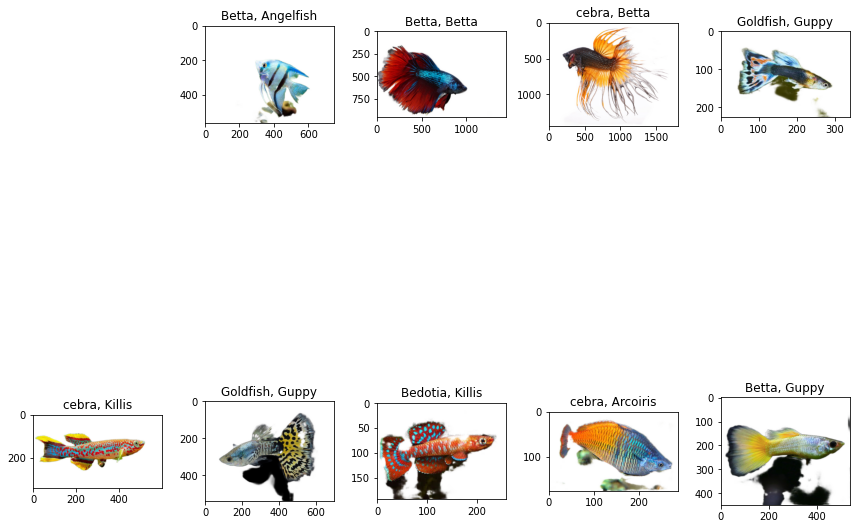

In [198]:
plt.figure(figsize=(12, 12))
for i, filename in zip(range(1,10), validate_df['Filename'][:10]):
    plt.subplot(2,5, i+1)
    plt.imshow(imread(TEST_PATH+'/'+filename))
    result = np.where(preds_inception[i] == preds_inception[i].max())
    plt.title(f"{INV_CLASSES[result[0][0]]}, {re.split(r'[0-9]',filename)[0]}")
    
plt.tight_layout()
plt.savefig('prediccion_inception')
plt.show()

## VGG 16

In [200]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (IM_SIZE, IM_SIZE, 3), 
                  include_top = False, 
                  weights = 'imagenet')


for layer in base_model.layers: 
    layer.trainable = False
    
##### FULLY CONNECTED LAYER #####
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(9, activation='softmax')(x)

vgg16_model = tf.keras.models.Model(base_model.input, x)

vgg16_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['acc'])

In [209]:
vgg16_model.fit(train_generator, 
         validation_data = validation_generator,
         batch_size = 20, 
         epochs = 50, 
         callbacks = [earlystop])

Epoch 1/50
11/11 [==============================] - 6s 510ms/step - loss: 0.5511 - acc: 0.8194 - val_loss: 0.4223 - val_acc: 0.9091
Epoch 2/50
11/11 [==============================] - 5s 464ms/step - loss: 0.6226 - acc: 0.7685 - val_loss: 0.5045 - val_acc: 0.8909
Epoch 3/50
11/11 [==============================] - 5s 460ms/step - loss: 0.4412 - acc: 0.8287 - val_loss: 0.4056 - val_acc: 0.9091
Epoch 4/50
11/11 [==============================] - 5s 454ms/step - loss: 0.4664 - acc: 0.8380 - val_loss: 0.4830 - val_acc: 0.8909
Epoch 5/50
11/11 [==============================] - 5s 457ms/step - loss: 0.4345 - acc: 0.8750 - val_loss: 0.4669 - val_acc: 0.8727
Epoch 6/50
11/11 [==============================] - 5s 476ms/step - loss: 0.5719 - acc: 0.8148 - val_loss: 0.5501 - val_acc: 0.8545
Epoch 7/50
11/11 [==============================] - 5s 483ms/step - loss: 0.4914 - acc: 0.8380 - val_loss: 0.4048 - val_acc: 0.8909
Epoch 8/50
11/11 [==============================] - 5s 472ms/step - loss: 0.

In [210]:
preds_vgg16 = vgg16_model.predict(X_test[0:10])

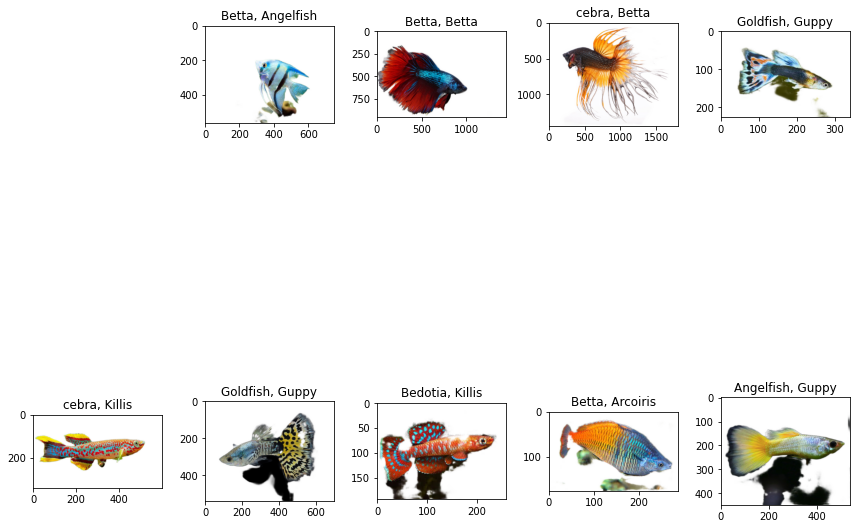

In [211]:
plt.figure(figsize=(12, 12))
for i, filename in zip(range(1,10), validate_df['Filename'][:10]):
    plt.subplot(2,5, i+1)
    plt.imshow(imread(TEST_PATH+'/'+filename))
    result = np.where(preds_vgg16[i] == preds_vgg16[i].max())
    plt.title(f"{INV_CLASSES[result[0][0]]}, {re.split(r'[0-9]',filename)[0]}")
    
plt.tight_layout()
plt.savefig('prediccion_vgg16')
plt.show()

## VGG19

In [213]:
from tensorflow.keras.applications.vgg19 import VGG19

base_model = VGG19(input_shape = (IM_SIZE, IM_SIZE, 3), 
                  include_top = False, 
                  weights = 'imagenet')


for layer in base_model.layers: 
    layer.trainable = False
    
##### FULLY CONNECTED LAYER #####
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(9, activation='softmax')(x)

vgg19_model = tf.keras.models.Model(base_model.input, x)

vgg19_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['acc'])

In [214]:
vgg19_model.fit(train_generator, 
         validation_data = validation_generator,
         batch_size = 128, 
         epochs = 50, 
         callbacks = [earlystop])

Epoch 1/50
11/11 [==============================] - 6s 526ms/step - loss: 6.0335 - acc: 0.2083 - val_loss: 1.1594 - val_acc: 0.6182
Epoch 2/50
11/11 [==============================] - 5s 480ms/step - loss: 3.5365 - acc: 0.3380 - val_loss: 0.9835 - val_acc: 0.6727
Epoch 3/50
11/11 [==============================] - 5s 473ms/step - loss: 1.6250 - acc: 0.5000 - val_loss: 0.8639 - val_acc: 0.7636
Epoch 4/50
11/11 [==============================] - 5s 478ms/step - loss: 1.2666 - acc: 0.5926 - val_loss: 0.7155 - val_acc: 0.8545
Epoch 5/50
11/11 [==============================] - 5s 485ms/step - loss: 1.1500 - acc: 0.5972 - val_loss: 0.6669 - val_acc: 0.8182
Epoch 6/50
11/11 [==============================] - 5s 488ms/step - loss: 0.9977 - acc: 0.6296 - val_loss: 0.6844 - val_acc: 0.8000
Epoch 7/50
11/11 [==============================] - 5s 487ms/step - loss: 1.0562 - acc: 0.6528 - val_loss: 0.5473 - val_acc: 0.8364
Epoch 8/50
11/11 [==============================] - 5s 496ms/step - loss: 0.

In [221]:
preds_vgg19 = vgg19_model.predict(X_test[0:10])


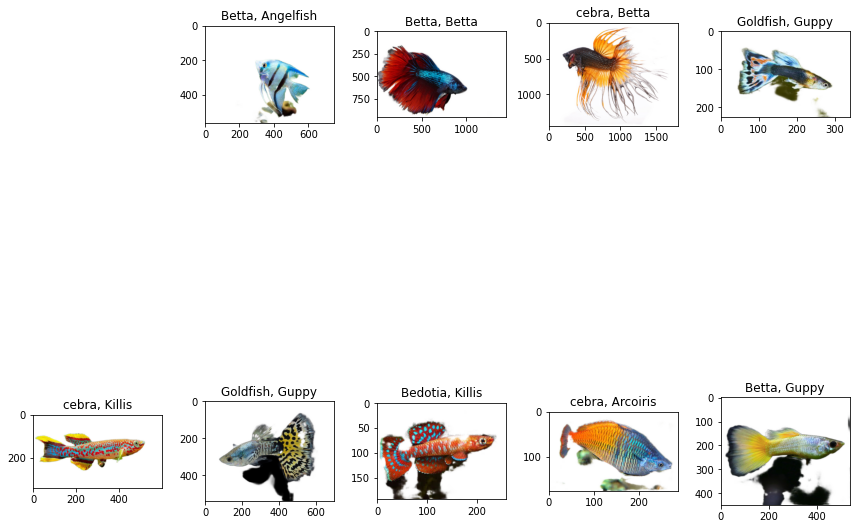

In [223]:
plt.figure(figsize=(12, 12))
for i, filename in zip(range(1,10), validate_df['Filename'][:10]):
    plt.subplot(2,5, i+1)
    plt.imshow(imread(TEST_PATH+'/'+filename))
    result = np.where(preds_vgg19[i] == preds_vgg19[i].max())
    plt.title(f"{INV_CLASSES[result[0][0]]}, {re.split(r'[0-9]',filename)[0]}")
    
plt.tight_layout()
plt.savefig('prediccion_vgg19')
plt.show()

## A new convolutional network since this shit is clearly not working

In [225]:
from tensorflow import keras

In [226]:
model = keras.Sequential([
    layers.Conv2D(64, (11,11), activation = 'relu', input_shape = (IM_SIZE, IM_SIZE, 3)), 
    # layers.MaxPooling2D(pool_size = (3,2)), 
    layers.Conv2D(128, (5,5), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (3,3)), 
    # layers.Conv2D(256, (3,3), activation = 'relu'),
    # layers.MaxPooling2D(pool_size = (2,2)),
    layers.Flatten(), 
    layers.Dense(256, activation = 'relu'),
    layers.Dense(9, activation = 'softmax')])

model.compile(optimizer = 'adam', 
             loss = 'categorical_crossentropy', 
             metrics = ['accuracy'])

ResourceExhaustedError: failed to allocate memory [Op:Mul]

In [186]:
model.fit(train_generator, 
         validation_data = validation_generator,
         batch_size = 20, 
         epochs = 50, 
         callbacks = [earlystop])

Epoch 1/50
25/25 [==============================] - 7s 219ms/step - loss: 0.3180 - accuracy: 0.0644 - val_loss: 0.2656 - val_accuracy: 0.0661
Epoch 2/50
25/25 [==============================] - 6s 227ms/step - loss: 0.2492 - accuracy: 0.0707 - val_loss: 0.2497 - val_accuracy: 0.0331
Epoch 3/50
25/25 [==============================] - 6s 248ms/step - loss: 0.2449 - accuracy: 0.1019 - val_loss: 0.2399 - val_accuracy: 0.0992
Epoch 4/50
25/25 [==============================] - 6s 245ms/step - loss: 0.2383 - accuracy: 0.1331 - val_loss: 0.2327 - val_accuracy: 0.1653
Epoch 5/50
25/25 [==============================] - 6s 222ms/step - loss: 0.2295 - accuracy: 0.1746 - val_loss: 0.2289 - val_accuracy: 0.1818
Epoch 6/50
25/25 [==============================] - 6s 235ms/step - loss: 0.2267 - accuracy: 0.2037 - val_loss: 0.2286 - val_accuracy: 0.1818
Epoch 7/50
25/25 [==============================] - 6s 227ms/step - loss: 0.2297 - accuracy: 0.1580 - val_loss: 0.2181 - val_accuracy: 0.2231
Epoch 

In [187]:
preds = model.predict(X_test)

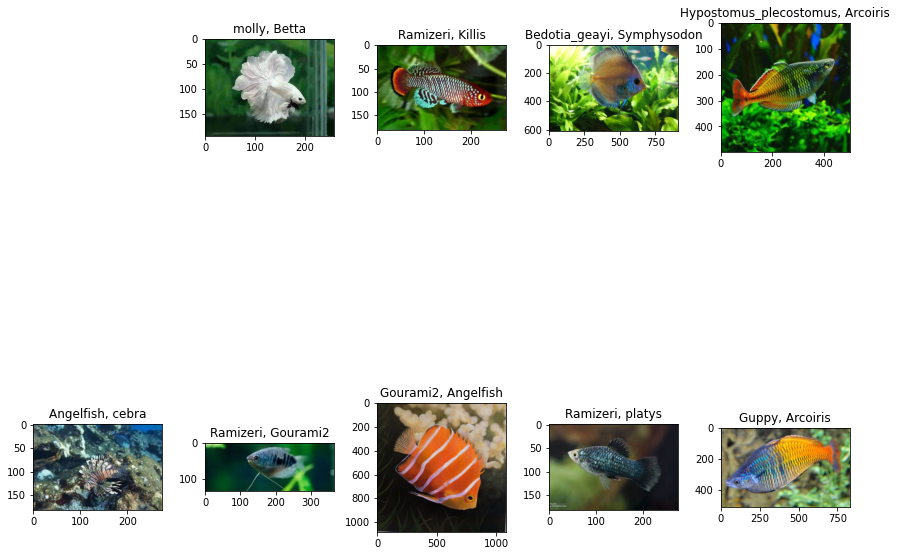

In [188]:
plt.figure(figsize=(12, 12))
for i, filename in zip(range(1,10), validate_df['Filename'][:10]):
    plt.subplot(2,5, i+1)
    plt.imshow(imread(TEST_PATH+'/'+filename))
    result = np.where(preds[i] == preds[i].max())
    plt.title(f"{INV_CLASSES[result[0][0]]}, {filename.split('.')[0]}")
    
plt.tight_layout()
plt.savefig('prediccion_vgg16')
plt.show()

## Trying to remove the background

In [210]:
import cv2
import numpy as np

# load image
img = cv2.imread('./Imagenes normalizadas/Angelfish.0_normalizada.jpg')

# convert to graky
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold input image as mask
mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)[1]

# negate mask
mask = 255 - mask

# apply morphology to remove isolated extraneous noise
# use borderconstant of black since foreground touches the edges
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# anti-alias the mask -- blur then stretch
# blur alpha channel
mask = cv2.GaussianBlur(mask, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)

# linear stretch so that 127.5 goes to 0, but 255 stays 255
mask = (2*(mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)

# put mask into alpha channel
result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask

# save resulting masked image
cv2.imwrite('person_transp_bckgrnd.png', result)

# display result, though it won't show transparency
cv2.imshow("INPUT", img)
cv2.imshow("GRAY", gray)
cv2.imshow("MASK", mask)
cv2.imshow("RESULT", result)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [ ]:
import pixellib
from pixellib.tune_bg import alter_bg

change_bg = alter_bg(model_type = "pb")
# change_bg.load_pascalvoc_model("xception_pascalvoc.pb")
change_bg.blur_bg("Imagenes normalizadas/Angelfish.18_normalizada.jpg", extreme = True, output_image_name="blur_img.jpg")